# PCA

- Calculate covariance, eig values, eig vectors 
- Inspect the spectrun 
- Choose number of principal components 
- Project on principal components and inspect 
- view on grid map and inspect  

# Clustering 
- Apply kmeans 
- Inspect



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
DATA_PATH = '/home/kal/Documents/codeprojects/usl_submission/data/weekly_smoothed_agg.csv'
df = pd.read_csv(DATA_PATH)
df = df.drop(['Unnamed: 0', 'loc_id'], axis=1)

df = df.round(5) 
df

,latitude,longitude,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,3.0,33.0,6.49627,5.38635,4.49128,4.19533,4.31119,4.39201,4.54070,5.83596,...,26.77083,25.65520,24.28021,21.86168,18.15368,15.08472,12.70791,9.91375,8.08213,8.75719
1,3.0,33.5,5.93635,5.00142,4.35111,4.12670,4.35792,4.34729,4.49210,5.64719,...,21.44246,20.62315,19.36737,17.50219,14.72997,12.44871,10.85762,8.56579,7.30954,7.77616
2,3.0,34.0,5.70514,4.82565,4.36924,4.15622,4.40665,4.37797,4.47595,5.37997,...,17.20554,16.91743,16.13393,14.85094,12.76980,11.01659,10.00988,7.93365,6.95294,7.06680
3,3.0,34.5,5.55232,4.65156,4.33723,4.04889,4.22062,4.24933,4.17075,4.78169,...,14.68533,15.05462,14.82676,13.97961,12.25254,10.67962,9.91097,7.83512,6.74176,6.74819
4,3.0,35.0,4.78572,4.02284,3.85838,3.52846,3.65751,3.68210,3.43761,3.89393,...,10.36384,11.22362,11.41076,11.18859,10.08972,8.87939,8.38078,6.66211,5.76362,5.80713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,15.0,46.0,0.14146,0.16554,0.26512,0.42503,0.97214,1.23902,1.11140,1.20073,...,0.38117,0.37964,0.32752,0.27745,0.22043,0.17633,0.14269,0.14516,0.13288,0.44676
771,15.0,46.5,0.10477,0.11864,0.22369,0.31521,0.82931,0.93590,0.78097,0.82533,...,0.40238,0.43553,0.35971,0.28107,0.21757,0.17109,0.13056,0.12462,0.10868,0.30776
772,15.0,47.0,0.20786,0.22615,0.32826,0.45821,1.04208,1.08210,0.91756,0.95481,...,0.92727,0.98564,0.82885,0.63041,0.49861,0.40291,0.30461,0.29105,0.25283,0.42267
773,15.0,47.5,0.35756,0.39726,0.52315,0.69260,1.43612,1.47636,1.31012,1.33684,...,1.20044,1.33298,1.13311,0.86721,0.69976,0.59458,0.46776,0.44926,0.41536,0.65943


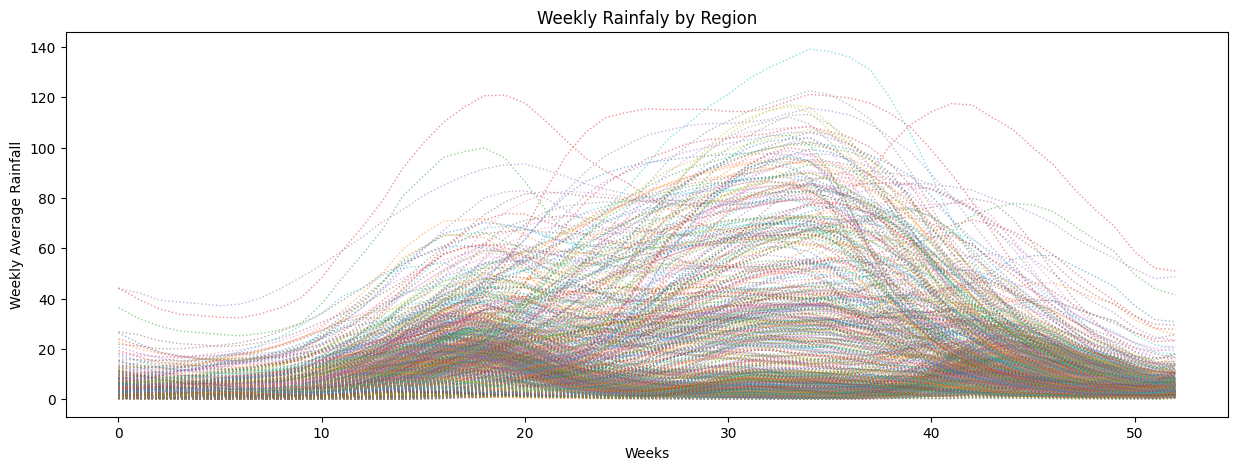

In [42]:
fig = plt.figure(figsize=(15, 5))

for i in range(df.shape[0]):
    ypoints =  df.iloc[i,2:].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show()       
        

### Covariance Matrix, Eig Vector and Eig Value

In [43]:
data = df.iloc[:,2:].values
data.shape

(775, 53)

In [44]:
def shifted(data):
    # subtract each feature vector from its mean
    shifted_data = data - np.mean(data,axis=0) 
    return shifted_data

In [45]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T)/num_samples
    return cov

In [46]:
shifted_data = shifted(data).T
cov = calculate_cov(shifted_data)

In [47]:
cov

array([[17.59065588, 16.08605083, 14.83750282, ..., 22.6486077 ,
        20.09954559, 19.95585812],
       [16.08605083, 14.99240626, 14.0458631 , ..., 20.06480507,
        18.07652642, 18.28193527],
       [14.83750282, 14.0458631 , 13.38887474, ..., 17.98567994,
        16.44266338, 16.89522726],
       ...,
       [22.6486077 , 20.06480507, 17.98567994, ..., 30.87228212,
        26.65147144, 25.76508106],
       [20.09954559, 18.07652642, 16.44266338, ..., 26.65147144,
        23.3322344 , 22.81638875],
       [19.95585812, 18.28193527, 16.89522726, ..., 25.76508106,
        22.81638875, 23.13837805]])

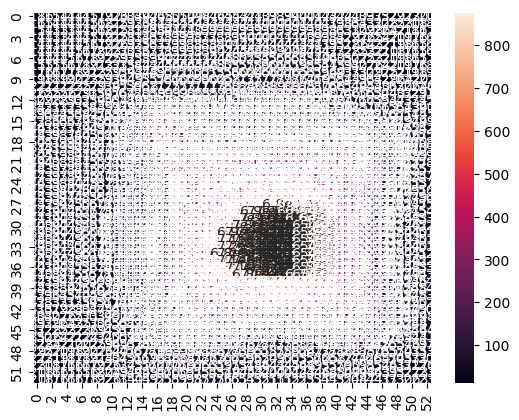

In [48]:
hm = sns.heatmap(data=cov, annot=True) 
plt.show()

In [49]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [50]:
features_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51',
       '52'])

In [51]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '41' '43' '44' '46' '50' '52' '51'
 '49' '48' '47' '45' '42' '40' '39' '38' '37']
eigenvalues: [1.23513947e+04 1.93906295e+03 3.59725344e+02 9.64478110e+01
 9.10565084e+01 7.66978920e+01 2.07070597e+01 1.29032878e+01
 5.60756591e+00 4.01675670e+00 1.63874966e+00 1.30822559e+00
 4.43348552e-01 3.80742583e-01 3.18083362e-01 2.10635776e-01
 1.75643049e-01 1.66822701e-01 1.15464249e-01 7.23879363e-02
 6.35099440e-02 5.68901682e-02 4.66150863e-02 4.28895388e-02
 3.96343032e-02 3.44372310e-02 2.86894181e-02 2.68697976e-02
 2.52848872e-02 2.32152141e-02 1.94729526e-02 1.72601260e-02
 1.53640923e-02 1.38683043e-02 1.33080151e-02 1.14451536e-02
 1.04928846e-02 8.49035207e-03 7.80422521e-03 7.33385731e-03
 6.76855620e-03 5.90046690e-03 5.63282741e-03 5.48976090e-03
 4.67439947e-03 4.33948716e-03 4.134156

### Eign values of C

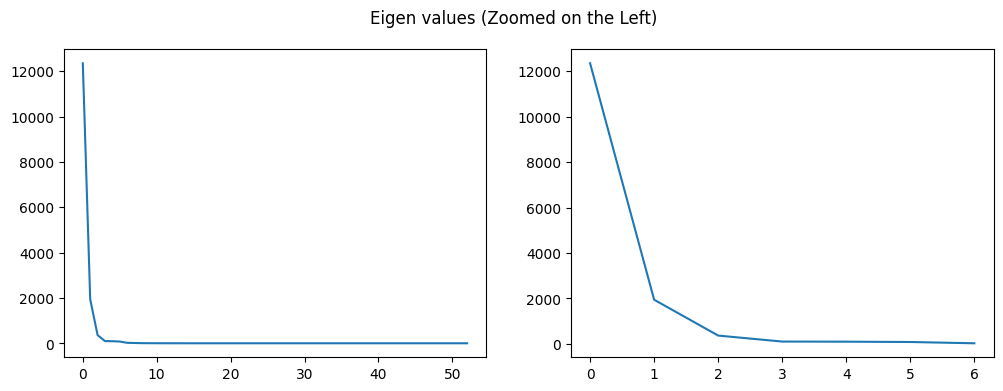

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(eigenvalues)
ax2.plot(eigenvalues[:7])

fig.suptitle('Eigen values (Zoomed on the Left)')
plt.show()



### PCA

In [53]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [54]:
def calculate_error(F,top_eigenvectors,data):
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    error = np.mean((data.T-F_inverse)**2)
    return error,F_inverse.T

In [55]:
pca_error = []

for k in range(53,0,-1):
    data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    pca_error.append(error)

/tmp/ipykernel_17520/2278984581.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels)
/tmp/ipykernel_17520/2278984581.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels2)


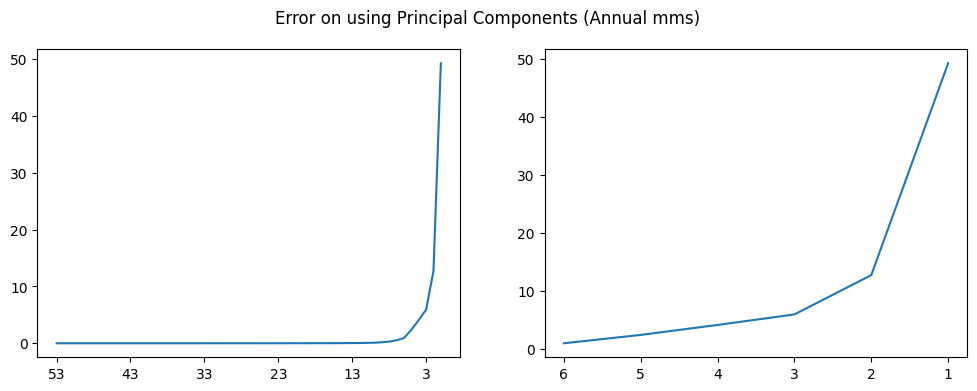

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(pca_error)
ax2.plot(pca_error[-6:])

labels = [item.get_text() for item in ax1.get_xticklabels()]

labels[1] = 53; labels[2] = 43; labels[3] = 33; labels[4] = 23; labels[5] = 13; labels[6] = 3
ax1.set_xticklabels(labels)

labels2 = [item.get_text() for item in ax2.get_xticklabels()]

labels2[1] = 6; labels2[2] = 5; labels2[3] = 4; labels2[4] = 3; labels2[5] = 2; labels2[6] = 1
ax2.set_xticklabels(labels2)

fig.suptitle('Error on using Principal Components (Annual mms)')
plt.show()

### Selection of K 

In [57]:
k = 3
data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

3 number of components Error: 5.90


In [58]:
dataframe = pd.DataFrame.from_records(data_reduced.T)

### Map Projection of Values of PCs

In [59]:
pc1_rain_map = np.random.rand(df['latitude'].unique().shape[0], df['longitude'].unique().shape[0])
pc2_rain_map = np.random.rand(df['latitude'].unique().shape[0], df['longitude'].unique().shape[0])
pc3_rain_map = np.random.rand(df['latitude'].unique().shape[0], df['longitude'].unique().shape[0])
pc4_rain_map = np.random.rand(df['latitude'].unique().shape[0], df['longitude'].unique().shape[0])
rain_week0 =  df.iloc[:,40].values.flatten().tolist()
rain_week0 =  rain_week0 - np.max(rain_week0, axis=0) 

count = 0

for i in range(df['latitude'].unique().shape[0]):
    for j in range(df['longitude'].unique().shape[0]):
        pc1_rain_map[i,j] = dataframe[0][count]
        pc2_rain_map[i,j] = dataframe[1][count]
        pc3_rain_map[i,j] = dataframe[2][count]
        pc4_rain_map[i,j] = rain_week0[count]
        count += 1

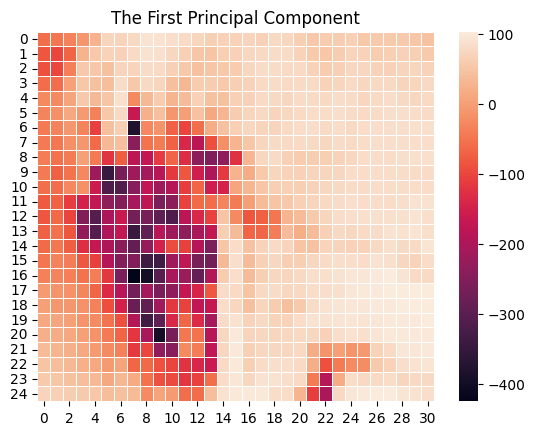

In [60]:
ax = plt.axes()
sns.heatmap(pc1_rain_map, linewidth=0.5)

ax.set_title('The First Principal Component')
plt.show()

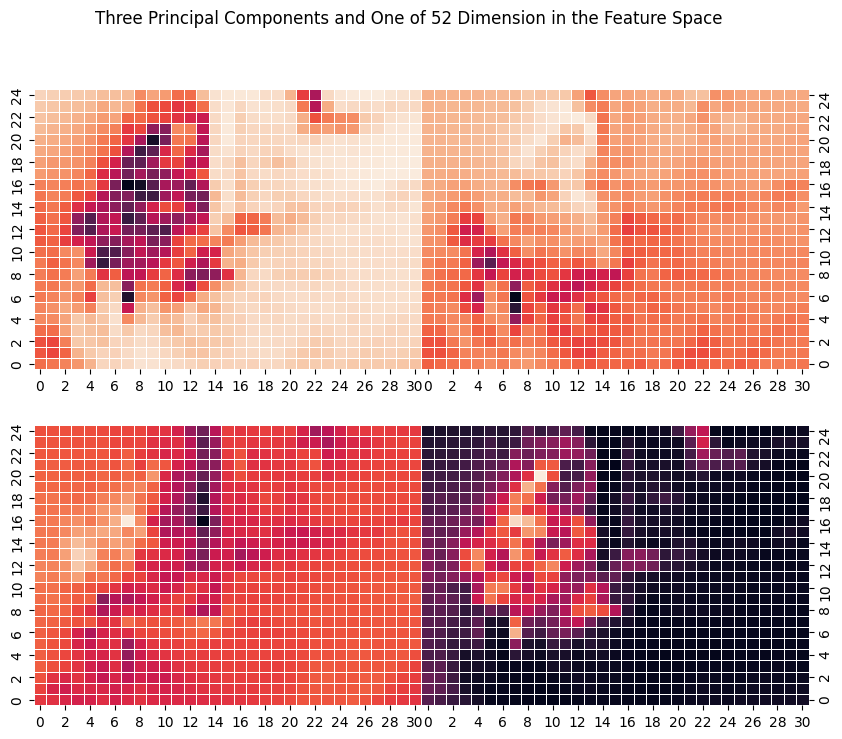

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Three Principal Components and One of 52 Dimension in the Feature Space')
fig.subplots_adjust(wspace=0.01)

sns.heatmap(pc1_rain_map, linewidth=0.5, ax=ax1, cbar=False)
sns.heatmap(pc2_rain_map, linewidth=0.5, ax=ax2, cbar=False)
sns.heatmap(pc3_rain_map, linewidth=0.5, ax=ax3, cbar=False)
sns.heatmap(pc4_rain_map, linewidth=0.5, ax=ax4, cbar=False)

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()


fig.subplots_adjust(wspace=0.001)
plt.show()



for ax in fig.get_axes():
    ax.label_outer()

### 2D Projection

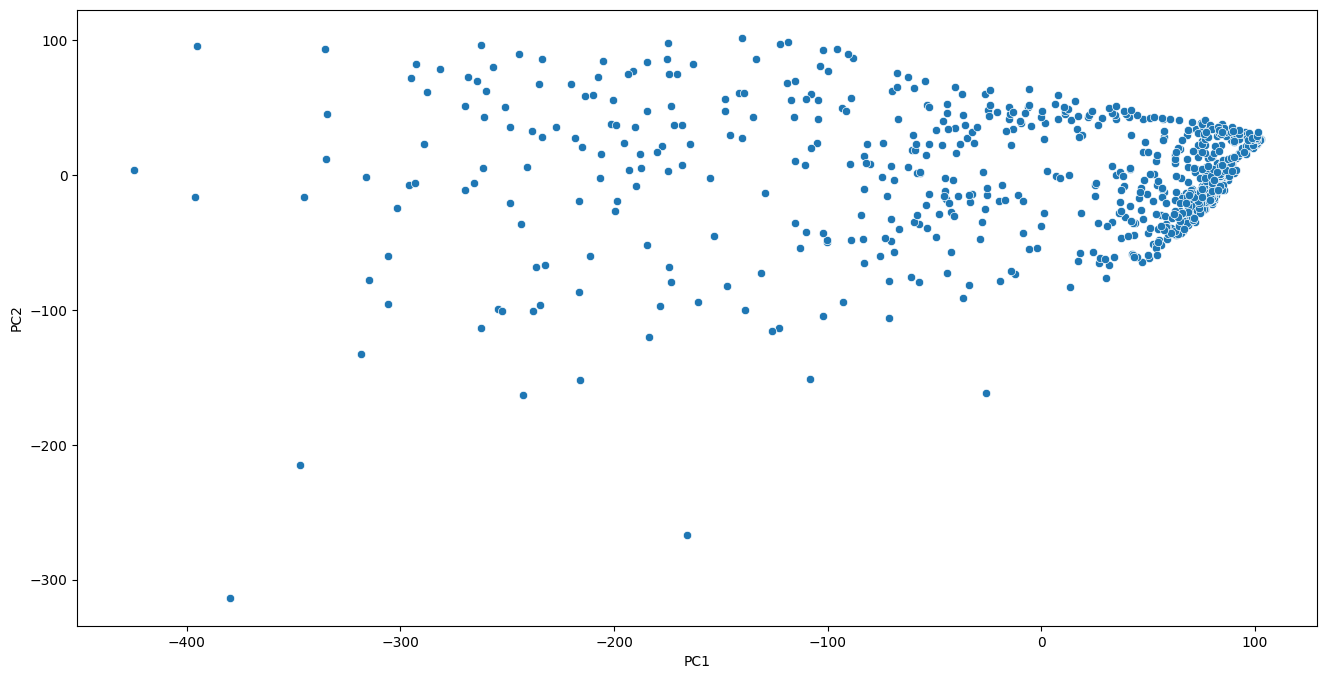

In [62]:
# Old without smoothing 

fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

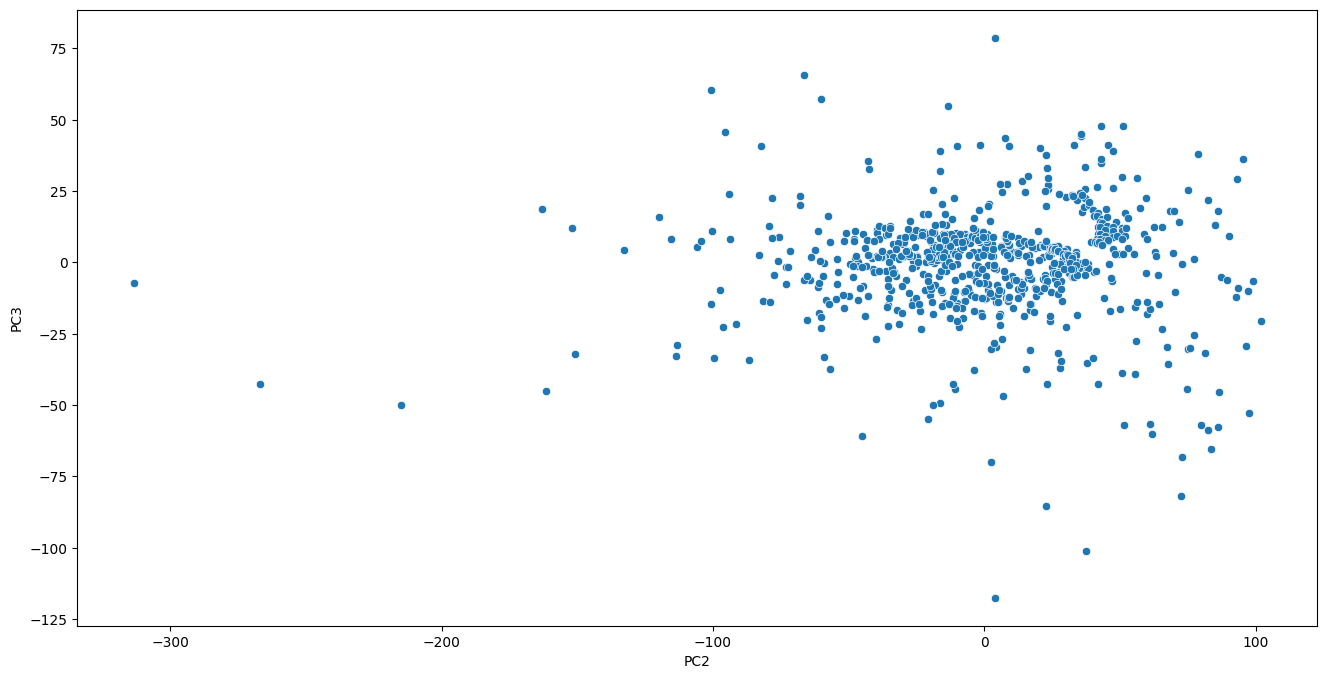

In [63]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=dataframe, x=dataframe[1], y=dataframe[2], ax=ax)
 
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
plt.show()

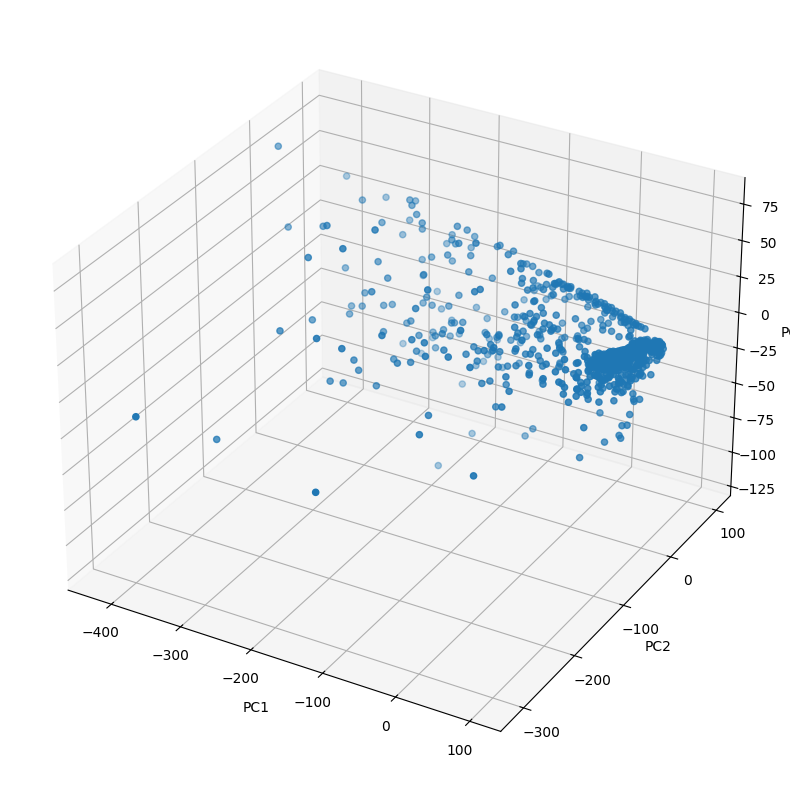

In [64]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataframe[0], dataframe[1], dataframe[2], s = 20)
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Clustering on Projected Data

### KMeans

In [65]:
k = 5

km_data = [dataframe.to_numpy()]
km_data

[array([[-57.30404182, -36.3368822 ,  -2.9933152 ],
        [-47.79934094, -28.77796781,  -6.07123716],
        [-33.33035331, -19.93895351, -11.37754901],
        ...,
        [ 92.55029714,  33.74802891,  -1.03232797],
        [ 89.61710275,  32.67130128,  -2.40316174],
        [ 84.51666483,  32.11186107,  -2.2089367 ]])]

In [66]:
def euclidean_dist(A, B):
      return np.sum((A - B)**2)**0.5

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j[0,0]))

    colors = 10*["g","r","c","b","k"]

    ## Data
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker=".", color=colors[i], s=10, linewidths=3)
        j+=1

    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="x", color="k", s=50, linewidths=2)

    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="o", color="DarkBlue", s=50, linewidths=1)

In [67]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data
        self.centeriod_init = centeriod_init

    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'):
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
            
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids

    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))

        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        cents_orig = cents.copy()
        changed = True
        num_iter = 0

        while changed and num_iter<100:
            changed = False
            
            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j
                    if cluster_assignments[i, 0] != min_index:
                        changed = True

                cluster_assignments[i, :] = min_index, min_dist**2
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
            num_iter += 1

        return cents, cluster_assignments, num_iter, cents_orig

In [68]:
kmeans = K_Means(k=k,data = km_data,centeriod_init='random')

centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(km_data[0])


index = cluster_assignments[:,0] ## the cluster index
distance = cluster_assignments[:,1]  ## the cluster distance

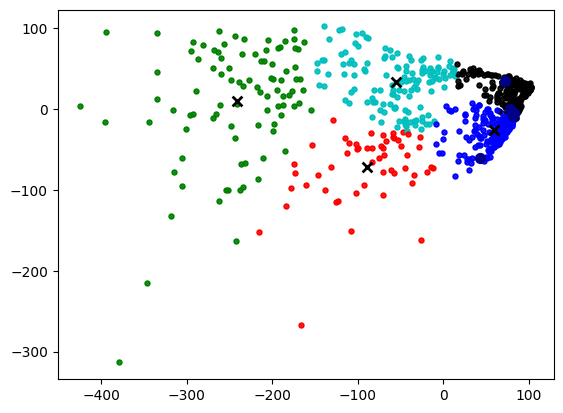

In [69]:
plot(km_data,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

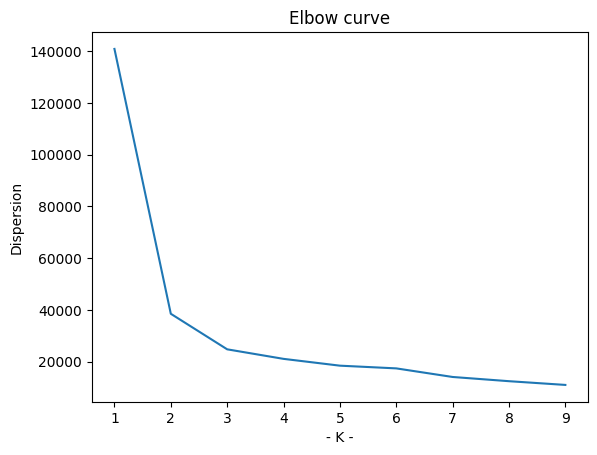

In [70]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = km_data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(km_data[0])
    distance = cluster_assignments[:,1]  ## the cluster distances

    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("- K -")
plt.ylabel("Dispersion")

In [71]:
k = 5

kmeans = K_Means(k=k,data = km_data,centeriod_init='random')

centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(km_data[0])

index = cluster_assignments[:,0] ## the cluster index
distance = cluster_assignments[:,1]  ## the cluster distance

In [72]:
c_labels = np.array(index)[:,0]
for num in np.unique(c_labels): print(f"Cluster {num}: {sum(c_labels==num)}")

Cluster 0.0: 77
Cluster 1.0: 30
Cluster 2.0: 109
Cluster 3.0: 95
Cluster 4.0: 464


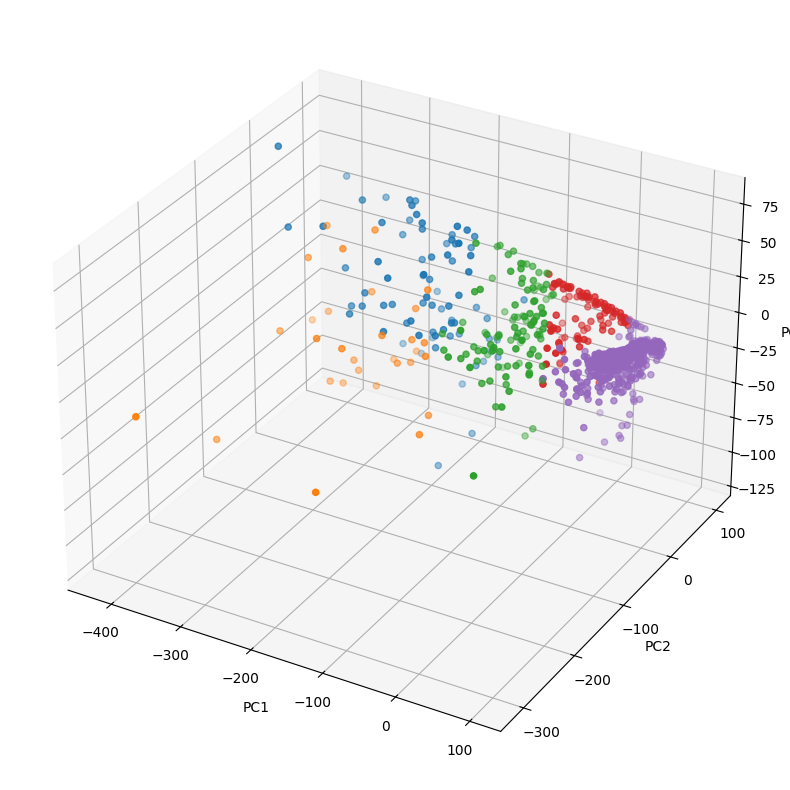

In [73]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

c_labels = np.array(index)[:,0]
for num in np.unique(c_labels): 
    ax.scatter(km_data[0][c_labels==num,0], km_data[0][c_labels==num,1], km_data[0][c_labels==num,2], s = 20 , label = f"Cluster {num}")
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

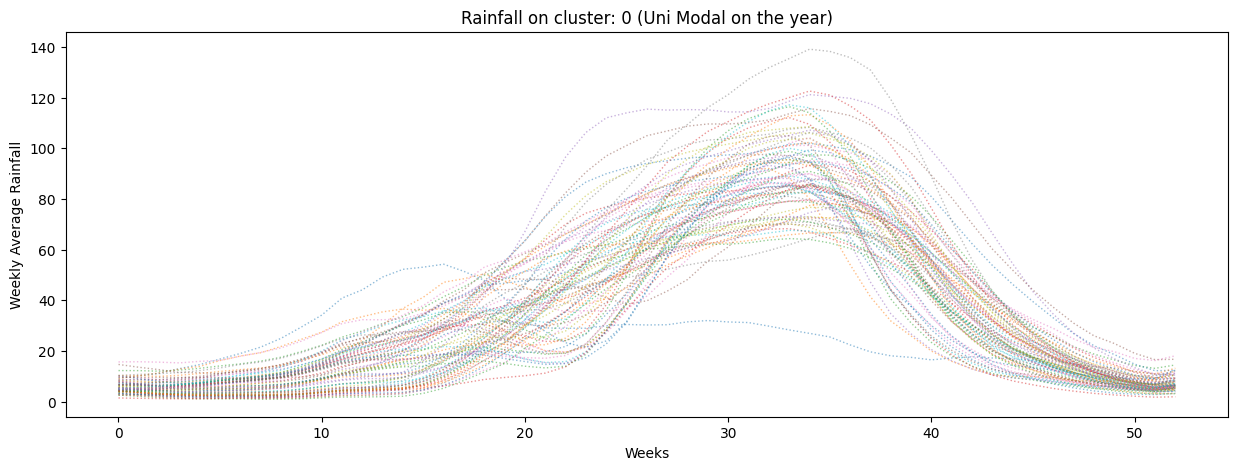

In [81]:
fig = plt.figure(figsize=(15, 5))

cl = 0

for i in range(df.shape[0]):
    if c_labels[i] == cl : 
        ypoints =  df.iloc[i,2:].values.flatten().tolist()
        plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Rainfall on cluster: 0 (Uni Modal on the year)')
plt.show()  

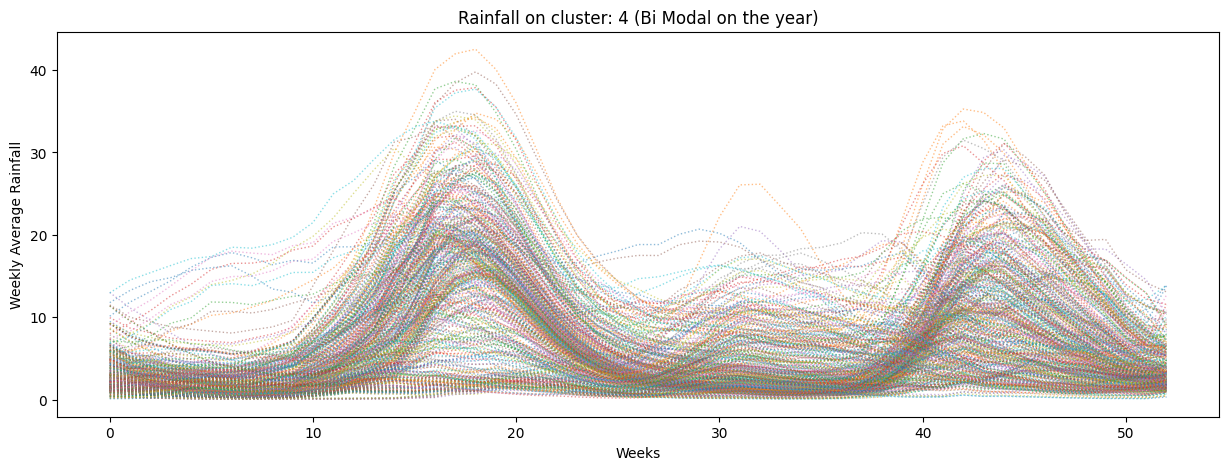

In [76]:
fig = plt.figure(figsize=(15, 5))

cl = 4

for i in range(df.shape[0]):
    if c_labels[i] == cl : 
        ypoints =  df.iloc[i,2:].values.flatten().tolist()
        plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Rainfall on cluster: 4 (Bi Modal on the year)')
plt.show()  